# View pheno outputs at sample points

In [1]:
import os
import sys
from pathlib import Path
import osgeo
from glob import glob
import rasterio as rio
from rasterio import plot
import shutil
import tempfile
import json
import random
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
from pyproj import Proj, transform
from pyproj import CRS
from shapely.geometry import box
from shapely.geometry import shape
from shapely.geometry import MultiPoint
from shapely.geometry import Point
from shapely.geometry import Polygon
from rasterio.plot import show
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib notebook

In [2]:
sys.path.append(r"../pheno_robust")
from pheno import *
from ts import *

In [3]:
filter_class = 'soy'
start_yr = 2021
end_yr = 2022
comp_dir = f'../data/samp_comp'

## To get a single spec index at a single sample point:

<IPython.core.display.Javascript object>


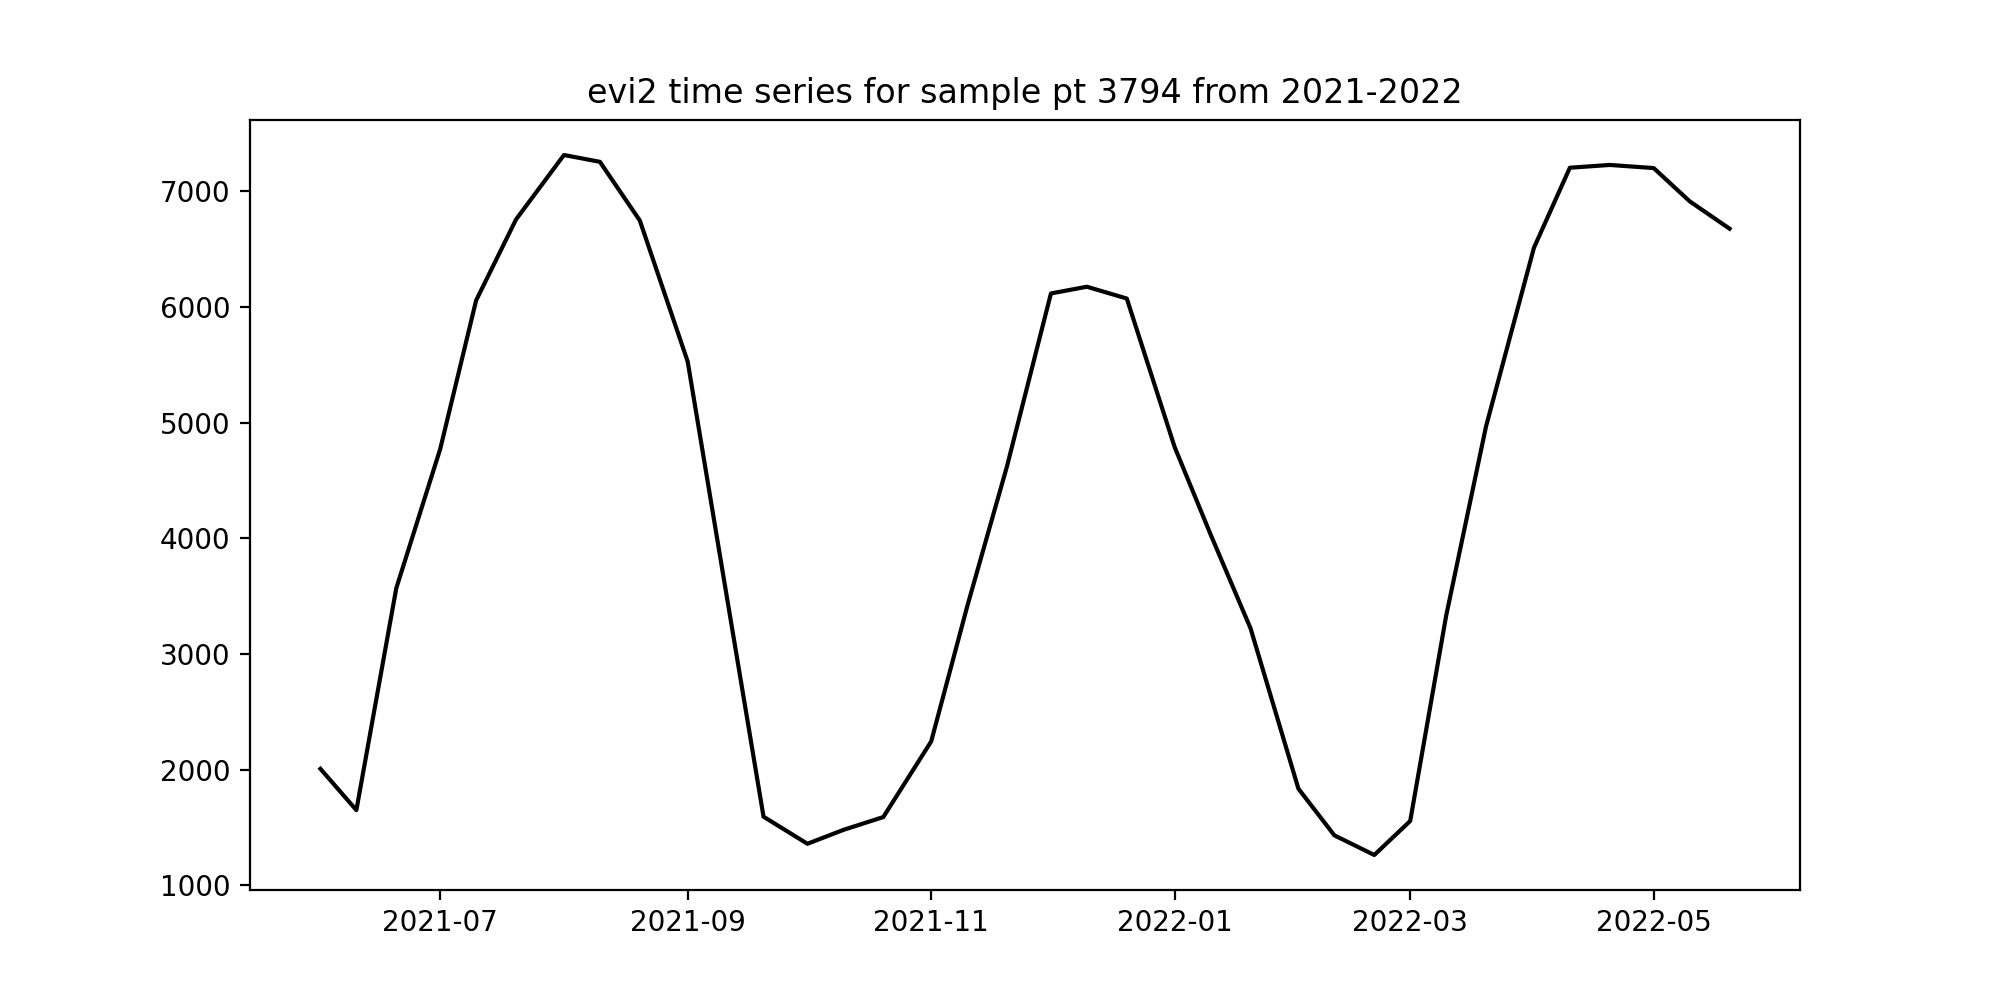

In [4]:
samp_pt = 3794
pt_dir = f'../data/samp_pts/soy/{samp_pt}_9pix'
spec_index = 'evi2'

ts = get_ts_at_cent(pt_dir, spec_index, start_yr, end_yr)
fig = plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts['val'], color='k')
plt.title(f'{spec_index} time series for sample pt {samp_pt} from {start_yr}-{end_yr}')
#plt.ylim(0,7000)
plt.show();

## To get multiple spec indices at a single sample point:

<IPython.core.display.Javascript object>


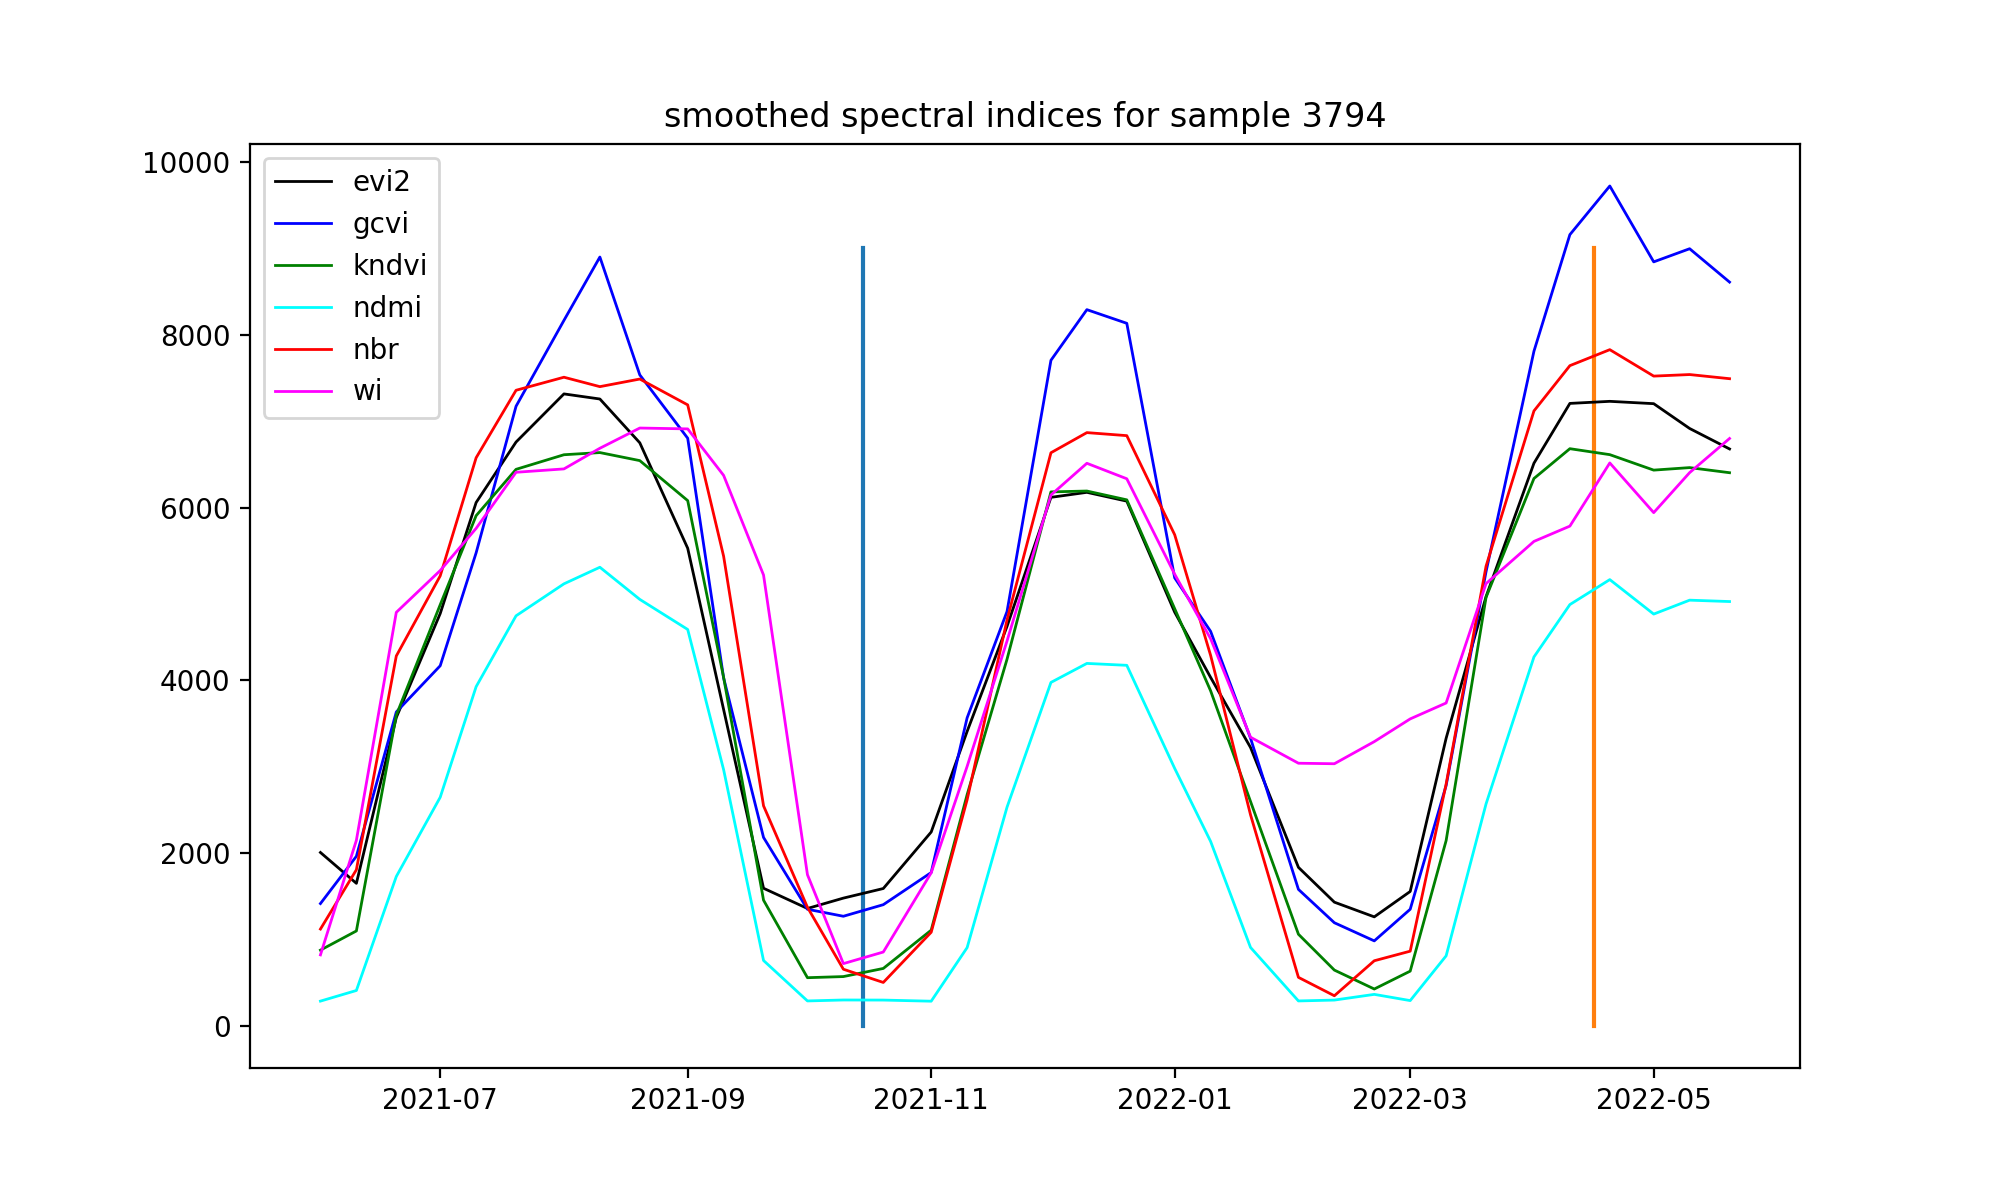

In [5]:
samp_pt = 3794
pt_dir = f'../data/samp_pts/soy/{samp_pt}_9pix'

ts_evi2 = get_ts_at_cent(pt_dir, 'evi2', start_yr, end_yr)
ts_gcvi = get_ts_at_cent(pt_dir, 'gcvi', start_yr, end_yr)
ts_wi = get_ts_at_cent(pt_dir, 'wi', start_yr, end_yr)
ts_kndvi = get_ts_at_cent(pt_dir, 'kndvi', start_yr, end_yr)
ts_nbr = get_ts_at_cent(pt_dir, 'nbr', start_yr, end_yr)
ts_ndmi = get_ts_at_cent(pt_dir, 'ndmi', start_yr, end_yr)

samppt = 0
fig = plt.figure(figsize=(10, 6))
plt.title(f'smoothed spectral indices for sample {samp_pt}')
start_wet = pd.to_datetime(287, unit='D', origin=str(start_yr))
start_dry = pd.to_datetime(105, unit='D', origin=str(start_yr + 1))
plt.plot([start_wet,start_wet], [0,9000])
plt.plot([start_dry,start_dry], [0,9000])
plt.plot(ts_evi2.index, ts_evi2['val'], color='black', linewidth=1.0, label='evi2')
plt.plot(ts_gcvi.index, ts_gcvi['val'], color='blue', linewidth=1.0, label='gcvi')
plt.plot(ts_kndvi.index, ts_kndvi['val'], color='green', linewidth=1.0, label='kndvi')
plt.plot(ts_ndmi.index, ts_ndmi['val'], color='cyan', linewidth=1.0, label='ndmi')
plt.plot(ts_nbr.index, ts_nbr['val'], color='red', linewidth=1.0, label='nbr')
plt.plot(ts_wi.index, ts_wi['val'], color='magenta', linewidth=1.0, label='wi')
plt.legend()


## To get multiple sample pts for single spec index

<IPython.core.display.Javascript object>


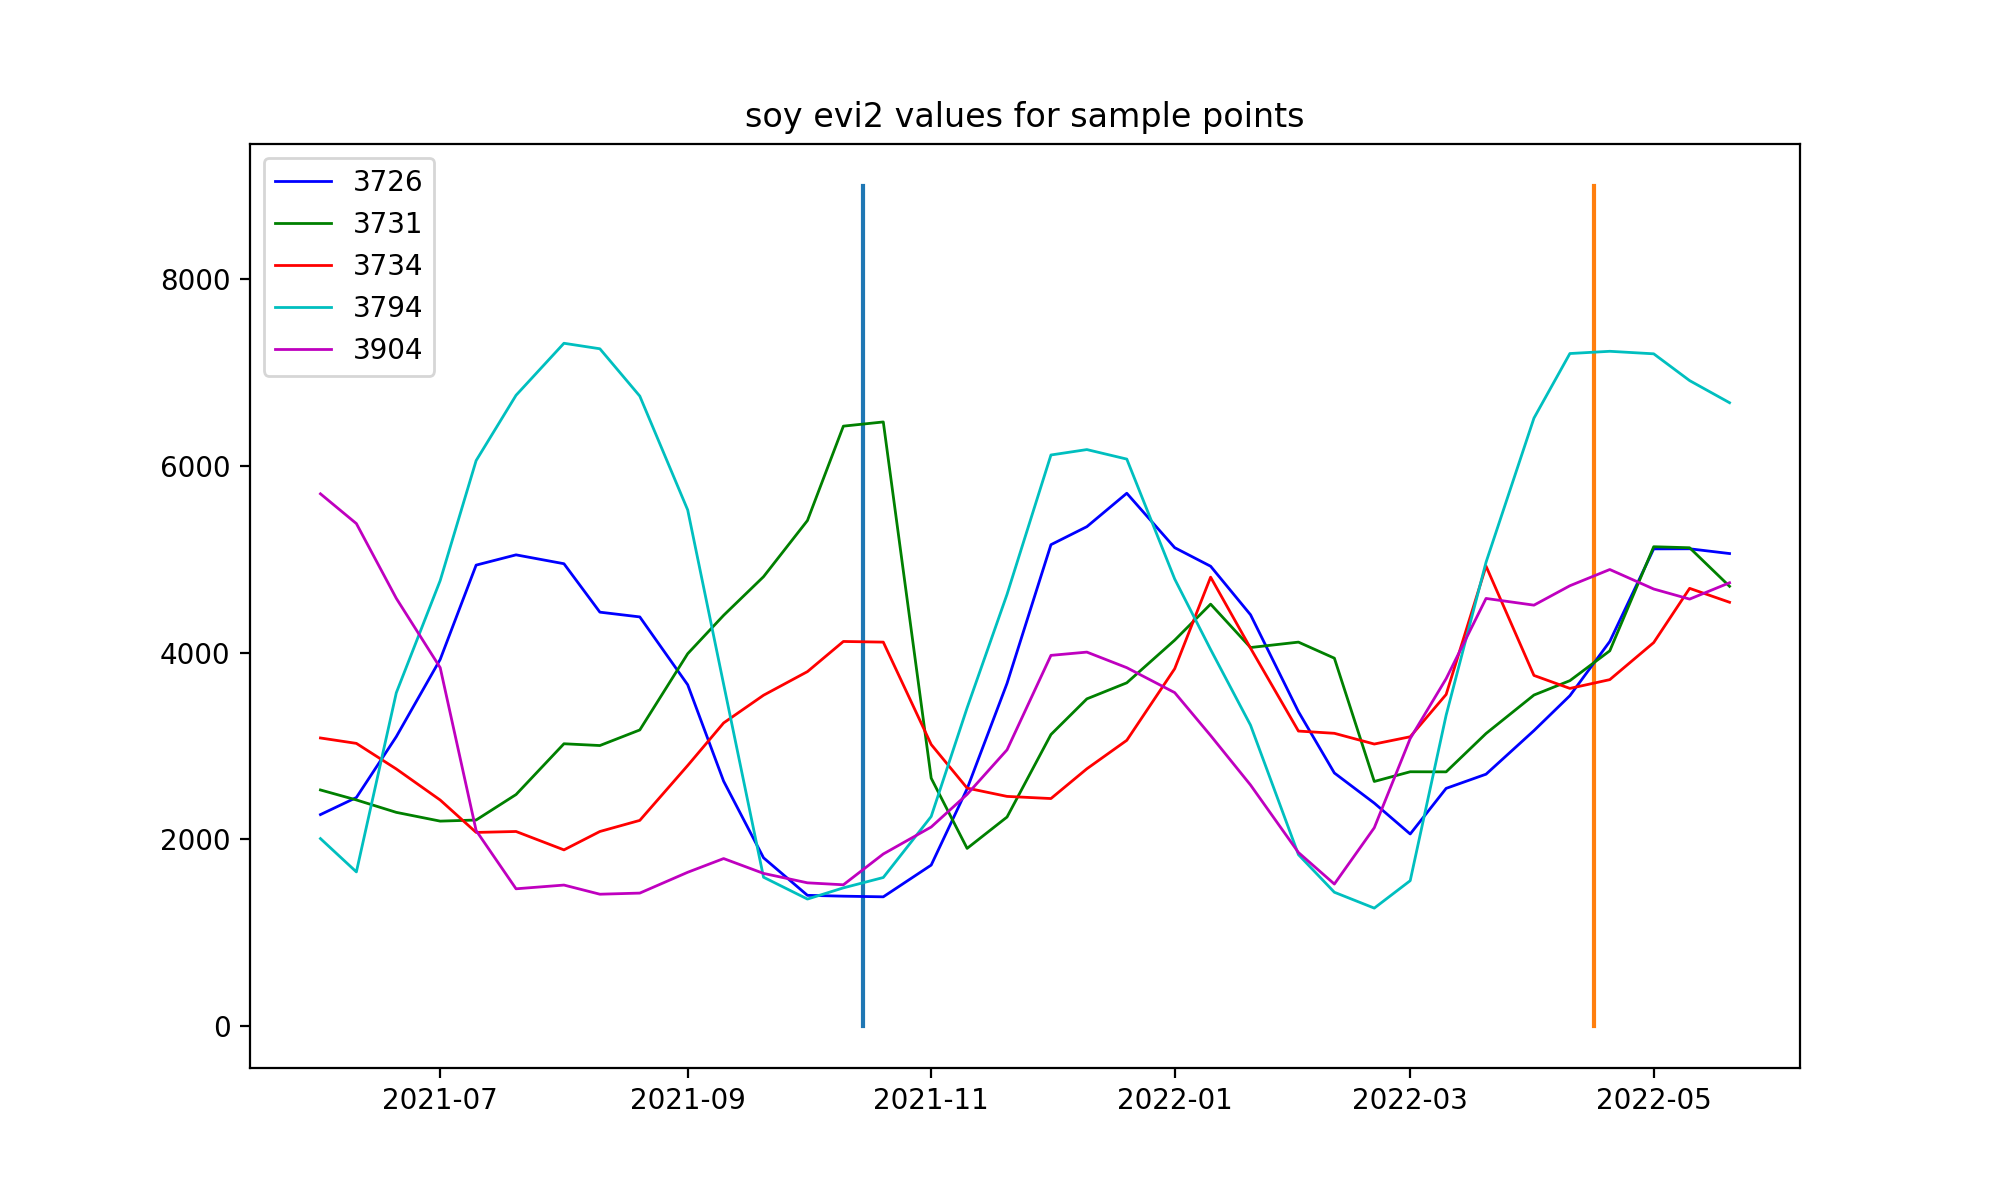

In [7]:
filter_class = 'soy'
spec_index = 'evi2'
pt_dirs = glob(f'../data/samp_pts/{filter_class}/*', recursive = True)

from itertools import cycle
cycol = cycle('bgrcmk')
    
fig = plt.figure(figsize=(10, 6))
plt.title(f'{filter_class} {spec_index} values for sample points')
start_wet = pd.to_datetime(287, unit='D', origin=str(start_yr))
start_dry = pd.to_datetime(105, unit='D', origin=str(start_yr + 1))
plt.plot([start_wet,start_wet], [0,9000])
plt.plot([start_dry,start_dry], [0,9000])

for pt_dir in pt_dirs:
    pt_name = os.path.basename(pt_dir).split('_')[0]
    ts = get_ts_at_cent(pt_dir, 'evi2', start_yr, end_yr) 
    plt.plot(ts.index, ts['val'], c=next(cycol), linewidth=1.0, label=pt_name)
plt.legend()
plt.show();

## Examine phenology variables for a time series

In [8]:
samp_pt = 3794
filter_class = 'soy'
spec_index = 'evi2'
pt_dir = f'../data/samp_pts/{filter_class}/{samp_pt}_9pix'
pt_name = os.path.basename(pt_dir).split('_')[0]
temp = 'wet'
start_mo = 11
sigdif = 500
pad_days = [30,30]
pheno_vars = [f'maxv_{temp}', f'minv_{temp}', f'med_{temp}',f'slp_{temp}',f'numrot_{temp}',f'posd_{temp}',f'posv_{temp}',
              f'numlow_{temp}',f'tosd_{temp}',f'p1amp_{temp}',f'sosd_{temp}',f'sosv_{temp}',f'eosd_{temp}',f'eosv_{temp}',
              f'rog_{temp}',f'ros_{temp}',f'los_{temp}']

comp_path = os.path.join(comp_dir,f'{pt_name}_{start_yr}_{spec_index}_Phen_{temp}.tif')
if Path(comp_path).exists():
    print('comp already exists')
    phen_comp = comp_path
else:
    phen_comp = make_pheno_vars(pt_dir,comp_dir,start_yr,start_mo,spec_index,pheno_vars,sigdif,pad_days)

padded will add 30 days on left and 30 days on right 

start doy is: 305, padded start_doy is 275
getting wet season variables
['../data/samp_pts/soy/3794_9pix\\evi2_2021305.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2021314.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2021324.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2021335.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2021344.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2021354.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022001.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022010.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022020.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022032.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022041.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022051.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022060.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022069.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022079.tif', '../data/samp_pts/soy/3794_9pix\\evi2_2022091.tif', '../data/samp_pts/soy/3794_9pix\\evi2_20

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.34it/s]


making minv_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.55it/s]


making med_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.15it/s]


making slp_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.59it/s]


making numrot_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.30it/s]


making posd_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.94it/s]


making posv_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.57it/s]


making numlow_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.90it/s]


making tosd_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.06it/s]


making p1amp_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.79it/s]


making sosd_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.70it/s]


making sosv_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.88it/s]


making eosd_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.12it/s]


making eosv_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.92it/s]


making rog_wet_2021 raster


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.03it/s]

making ros_wet_2021 raster



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.17it/s]

making los_wet_2021 raster

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.26it/s]
writing stack for wet pheno_vars:["['maxv']", "['minv']", "['med']", "['slp']", "['numrot']", "['posd']", "['posv']", "['numlow']", "['tosd']", "['p1amp']", "['sosd']", "['sosv']", "['eosd']", "['eosv']", "['rog']", "['ros']", "['los']"]

getting dry season variables


In [9]:
valdict = get_values_at_cent(phen_comp)
print(valdict)

{'maxv': 7229, 'minv': 1263, 'med': 4625, 'slp': 10, 'numrot': 2, 'posd': 344, 'posv': 6176, 'numlow': 2, 'tosd': 416, 'p1amp': 0, 'sosd': 293, 'sosv': 1591, 'eosd': 397, 'eosv': 1836, 'rog': 89, 'ros': -81, 'los': 104}


<IPython.core.display.Javascript object>


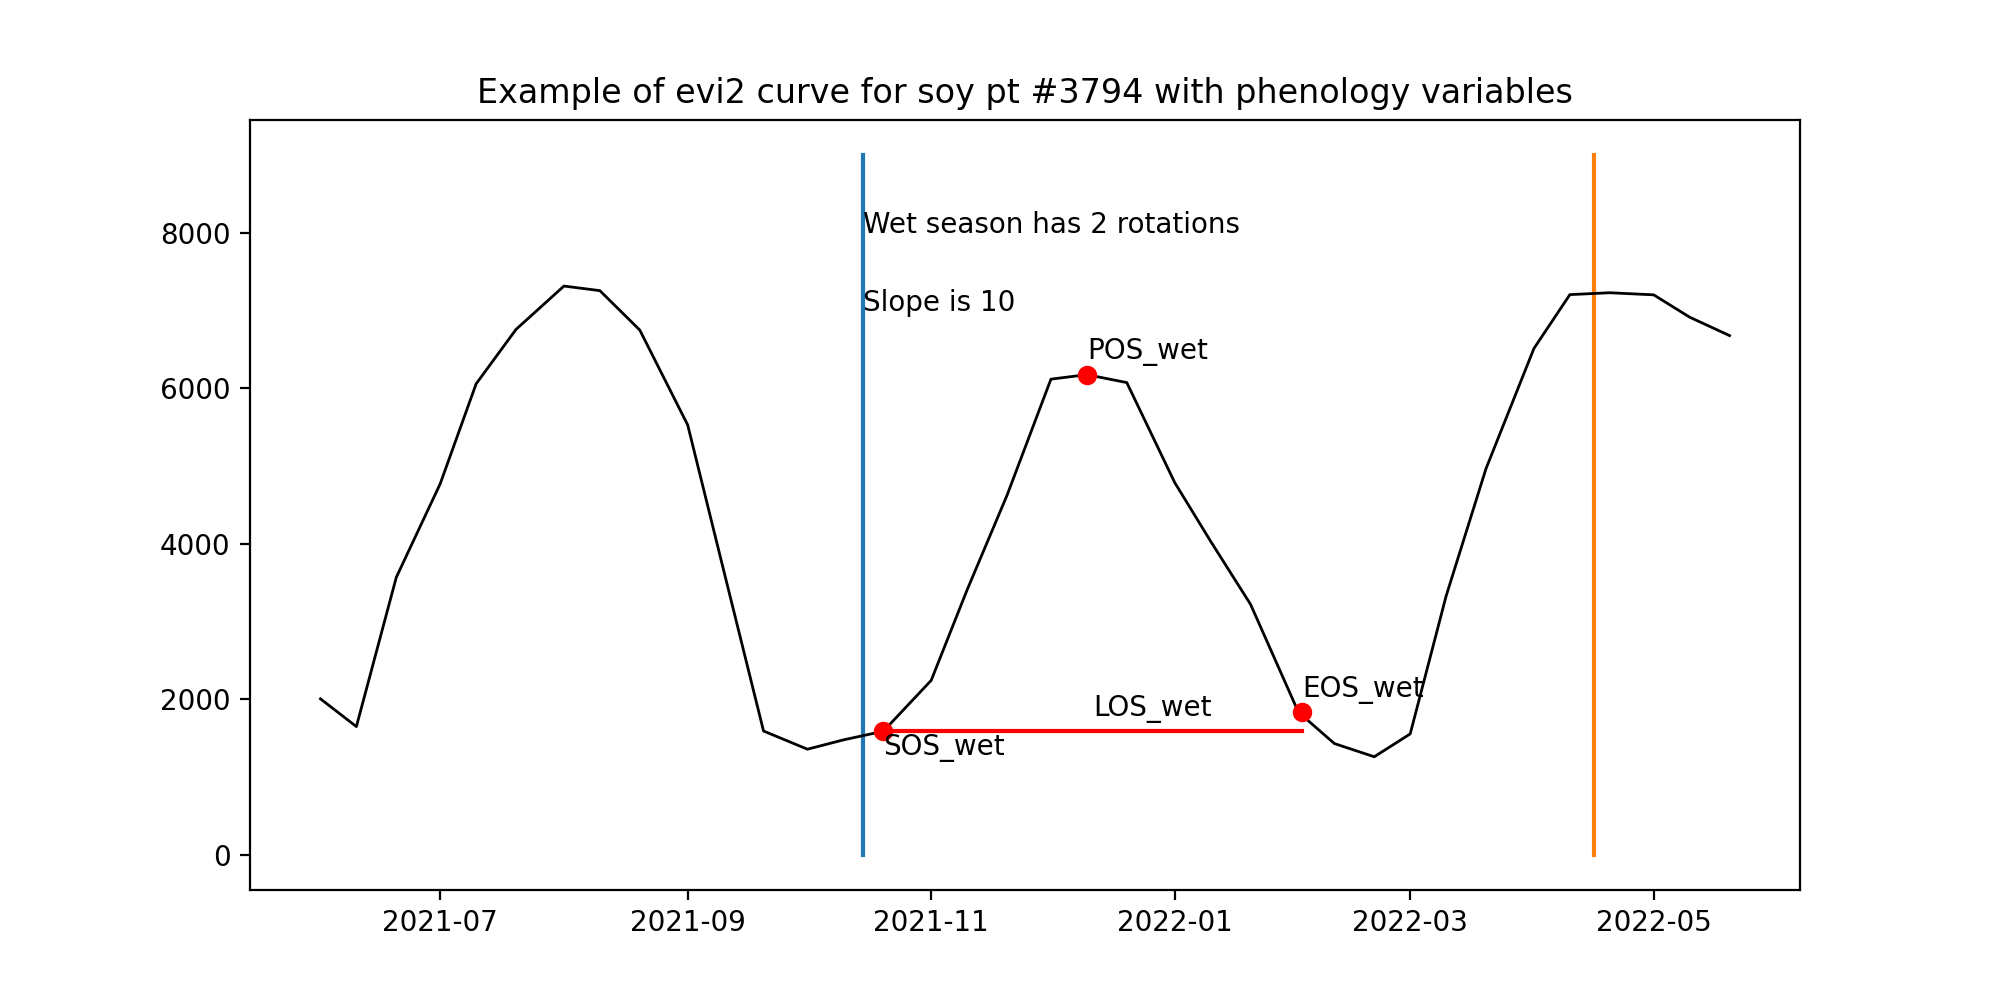

In [10]:
numrot = valdict.get('numrot')
slope = valdict.get('slp')

if valdict.get('sosd') < 366:
    sosd = datetime.datetime(start_yr, 1, 1) + datetime.timedelta(int(valdict.get('sosd')) - 1)
else:
    sosd = datetime.datetime(start_yr + 1, 1, 1) + datetime.timedelta(int(valdict.get('sosd') -365))  
sosv = int(valdict.get('sosv'))

if valdict.get('eosd')< 366:
    eosd = datetime.datetime(start_yr, 1, 1) + datetime.timedelta(int(valdict.get('eosd')) - 1)
else:
    eosd = datetime.datetime(start_yr + 1, 1, 1) + datetime.timedelta(int(valdict.get('eosd') -365))
eosv = int(valdict.get('eosv'))

if valdict.get('posd') < 366:
    posd = datetime.datetime(start_yr, 1, 1) + datetime.timedelta(int(valdict.get('posd')) - 1)
else:
    posd = datetime.datetime(start_yr + 1, 1, 1) + datetime.timedelta(int(valdict.get('posd') - 365))
posv = int(valdict.get('posv'))

fig = plt.figure(figsize=(10, 5))
start_wet = pd.to_datetime(287, unit='D', origin=str(start_yr))
start_dry = pd.to_datetime(105, unit='D', origin=str(start_yr + 1))
plt.plot([start_wet,start_wet], [0,9000])
plt.plot([start_dry,start_dry], [0,9000])
plt.annotate('Wet season has {} rotations'.format(numrot), xy=(start_wet,8000))
plt.annotate('Slope is {}'.format(slope), xy=(start_wet, 7000))
ts = get_ts_at_cent(pt_dir, spec_index, start_yr, end_yr)
plt.plot(ts.index, ts['val'], color='k', linewidth=1.0)
plt.plot(sosd,sosv,'ro')
plt.annotate('SOS_wet', xy=(sosd,sosv-300))
plt.plot(eosd,eosv,'ro')
plt.annotate('EOS_wet', xy=(eosd,eosv+200))
plt.plot(posd,posv,'ro')
plt.annotate('POS_wet', xy=(posd,posv+200))
plt.plot([sosd, eosd], [sosv, sosv], 'r')
avgd = (eosd - sosd) / 2
plt.annotate('LOS_wet',xy=(sosd + avgd, sosv + 200))
plt.title(f'Example of {spec_index} curve for {filter_class} pt #{samp_pt} with phenology variables')
#plt.ylim(0,9000)
plt.show()   